# Big Mart data cleaning and vizualization

## Feature Details

- Item_Identifier
- Item_Weight
    - Missing 17%
    - Remove missing data
- Item_Fat_Content
- Item_Visibility
- Item_Type
- Item_MRP
- Outlet_Identifier
- Outlet_Establishment_Year
- Outlet_Size
    - Missing 28%
    - Remove feature?
- Outlet_Location_Type
- Outlet_Type
- Item_Outlet_Sales

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [26]:
train = pd.read_csv("./BigMart/Train.csv")
test = pd.read_csv("./BigMart/Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Vizualization

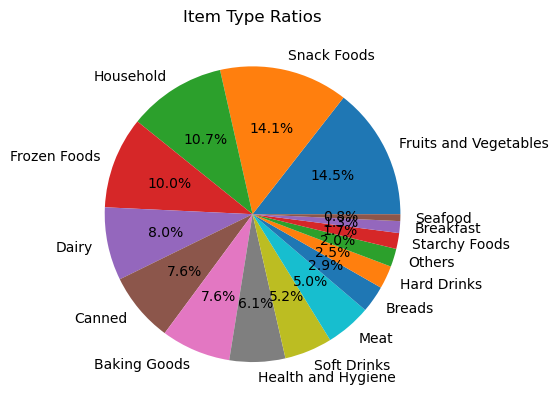

In [69]:
plt.pie(train['Item_Type'].value_counts(), 
        labels=train['Item_Type'].value_counts().index, 
        autopct='%1.1f%%');
plt.title('Item Type Ratios');

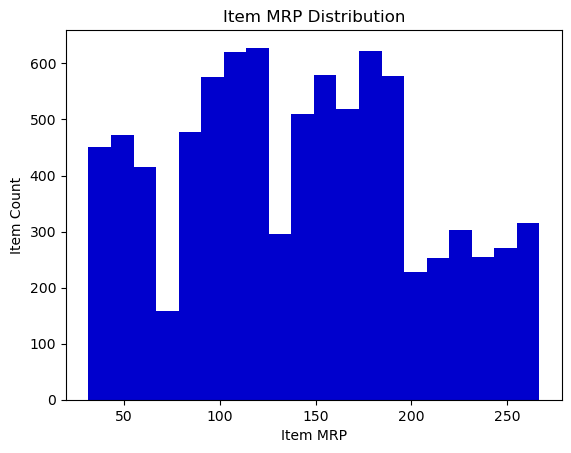

In [50]:
plt.hist(train['Item_MRP'], 
         bins=20, 
         color='mediumblue');
plt.xlabel('Item MRP');
plt.ylabel('Item Count');
plt.title('Item MRP Distribution');

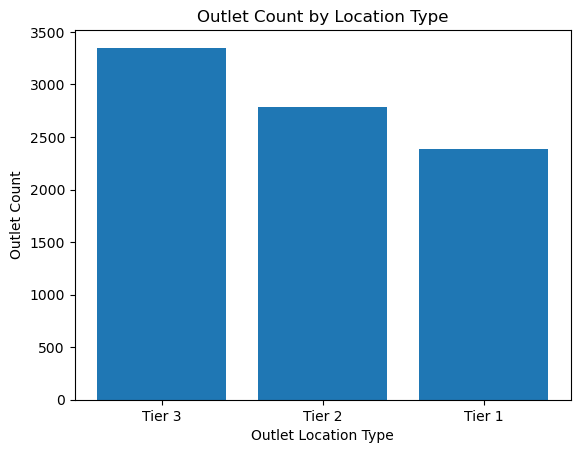

In [75]:
plt.bar(train['Outlet_Location_Type'].value_counts().index, 
        train['Outlet_Location_Type'].value_counts());
plt.xlabel('Outlet Location Type');
plt.ylabel('Outlet Count');
plt.title('Outlet Count by Location Type');

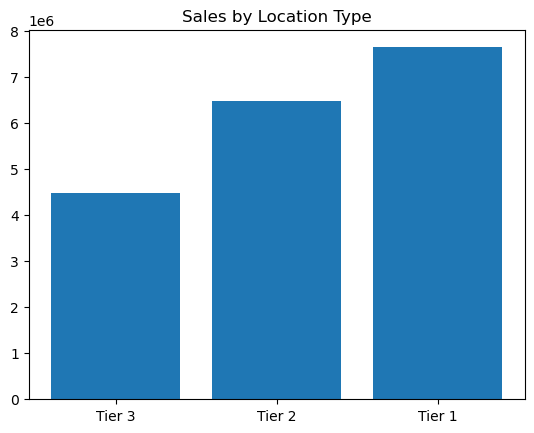

In [79]:
plt.bar(train['Outlet_Location_Type'].value_counts().index, 
        train['Item_Outlet_Sales'].groupby(train['Outlet_Location_Type']).sum());
plt.title('Sales by Location Type');

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (5615,).

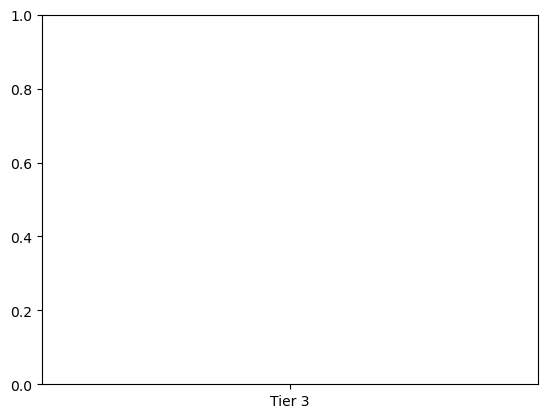

In [80]:
plt.bar(train['Outlet_Location_Type'].value_counts().index, 
        train['Item_Outlet_Sales'].groupby(train['Outlet_Location_Type']).value_counts());

## Split Data

In [28]:
y_train = train['Item_Outlet_Sales']
X_train = train.drop('Item_Outlet_Sales', axis=1)

## Clean Data

In [44]:
# Avoid error rerunning cell
if 'Outlet_Establishment_Year' in X_train.columns:
    X_train.drop('Outlet_Establishment_Year', axis=1, inplace=True)